# Gather

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re

In [2]:
tw_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

In [4]:
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [5]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [ ]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tw_arc['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success: Success on tweet id {}'.format(tweet_id))
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print('Error: Error on tweet id {}'.format(tweet_id))

Success: Success on tweet id 892420643555336193
Success: Success on tweet id 892177421306343426
Success: Success on tweet id 891815181378084864
Success: Success on tweet id 891689557279858688
Success: Success on tweet id 891327558926688256
Success: Success on tweet id 891087950875897856
Success: Success on tweet id 890971913173991426
Success: Success on tweet id 890729181411237888
Success: Success on tweet id 890609185150312448
Success: Success on tweet id 890240255349198849
Success: Success on tweet id 890006608113172480
Success: Success on tweet id 889880896479866881
Success: Success on tweet id 889665388333682689
Success: Success on tweet id 889638837579907072
Success: Success on tweet id 889531135344209921
Success: Success on tweet id 889278841981685760
Success: Success on tweet id 888917238123831296
Success: Success on tweet id 888804989199671297
Success: Success on tweet id 888554962724278272
Error: Error on tweet id 888202515573088257
Success: Success on tweet id 888078434458587

In [11]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [12]:
tweet = pd.DataFrame()

In [13]:
tweet['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet['retweet'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet['favorite'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [14]:
tweet

,id,retweet,favorite
0,892420643555336193,8295,37978
1,892177421306343426,6125,32601
2,891815181378084864,4055,24550
3,891689557279858688,8433,41306
4,891327558926688256,9135,39500
5,891087950875897856,3040,19848
6,890971913173991426,2012,11596
7,890729181411237888,18396,64053
8,890609185150312448,4175,27259
9,890240255349198849,7197,31276


# Access

In [15]:
tw_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [32]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
tw_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [33]:
sum(tw_arc.tweet_id.duplicated())

0

In [36]:
sum(tw_arc.expanded_urls.isnull())

59

In [50]:
tw_arc['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
the          8
Sadie        8
Daisy        7
Bailey       7
Toby         7
Buddy        7
an           7
Koda         6
Dave         6
Leo          6
Jack         6
Jax          6
Rusty        6
Stanley      6
Oscar        6
Scout        6
Milo         6
Bella        6
Sunny        5
          ... 
Rizzo        1
Dewey        1
Andru        1
Kloey        1
Darby        1
Rodman       1
Timmy        1
Shikha       1
Izzy         1
Brandi       1
Ace          1
Banditt      1
Georgie      1
Tiger        1
Tobi         1
Tuck         1
Beemo        1
Toffee       1
Aiden        1
Chuck        1
Bauer        1
Vince        1
Keet         1
Rolf         1
Norman       1
Charl        1
Strider      1
Bodie        1
old          1
Bayley       1
Name: name, Length: 957, dtype: int64

In [55]:
#It's wired some names are "a","the", l believe it is due to the scraping. It probably take the word after "This is " as names.
tw_arc.loc[(tw_arc['name'].str.islower())].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
getting          2
actually         2
mad              2
space            1
by               1
light            1
officially       1
this             1
unacceptable     1
all              1
such             1
incredibly       1
infuriating      1
old              1
my               1
life             1
his              1
Name: name, dtype: int64

In [53]:
# Find out if there is name contain in the text in above records
tw_arc.loc[(tw_arc['name'].str.islower()) & (tw_arc['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [60]:
tw_arc.loc[(tw_arc['name'].str.islower()) & (tw_arc['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [63]:
tw_arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [129]:
tw_arc['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [131]:
tw_arc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [260]:
tw_arc.loc[(tw_arc['text'].str.contains('doggo'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None

In [141]:
tw_arc.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [145]:
tw_arc.loc[(tw_arc['text'].str.contains('floofer'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None


In [146]:
tw_arc.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [144]:
tw_arc.loc[(tw_arc['text'].str.contains('pupper'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None


In [147]:
tw_arc.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [152]:
tw_arc.loc[(tw_arc['text'].str.contains('puppo'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [20]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [71]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [ ]:
tweet

In [28]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id          2340 non-null int64
retweet     2340 non-null int64
favorite    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [29]:
tweet.describe()

,id,retweet,favorite
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2920.329060,7946.376068
std,6.832564e+16,4920.109179,12308.353238
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,585.000000,1371.000000
50%,7.186224e+17,1362.500000,3454.500000
75%,7.986954e+17,3401.250000,9720.750000
max,8.924206e+17,83386.000000,163943.000000


In [30]:
tweet.retweet.sort_values()

283         0
333         2
266         2
1280        2
110         3
29          4
1065        6
54          7
417        10
63         10
2323       11
2282       14
180        17
1508       17
173        18
2303       20
206        23
2173       25
1222       25
399        27
182        28
599        29
952        30
2208       32
2244       33
871        34
337        35
2321       35
2243       35
277        36
        ...  
437     20594
438     20594
301     22518
924     22518
440     22710
518     22710
876     22740
1062    22740
1610    23014
642     23015
149     23522
645     24327
112     26020
612     26103
294     29577
449     29577
163     30679
159     31316
856     31316
1814    32516
1750    33678
130     35336
526     38129
436     39957
439     39957
65      43312
403     47564
523     60802
1064    61741
1024    83386
Name: retweet, Length: 2340, dtype: int64

In [69]:
tweet.favorite.sort_values()

455          0
808          0
802          0
153          0
154          0
798          0
787          0
571          0
781          0
159          0
294          0
293          0
574          0
577          0
165          0
766          0
582          0
761          0
758          0
755          0
752          0
583          0
174          0
747          0
812          0
815          0
819          0
827          0
535          0
1227         0
         ...  
645      48298
55       48449
53       49594
1098     51370
131      52344
856      52397
612      53240
385      55016
449      55057
356      55815
7        64053
119      65053
22       67629
347      70381
41       71558
149      74614
37       75880
1814     77194
76       78243
526      80205
112      81795
1750     82249
163      90519
439      91998
65      103806
1064    121126
130     121735
523     126788
403     140101
1024    163943
Name: favorite, Length: 2340, dtype: int64

In [70]:
all_columns = pd.Series(list(tw_arc) + list(images) + list(tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality

#### tw_arc table
- Erroneous datatypes of in_reply_to_status_id, in_reply_to_user_id, timestamp, rating etc.
- Missing expanded_urls for some records
- Infomation in text column got cut
- Missing data in dog stage
- There is no rating for record 314
- Datasets contains retweets
- Names are incomplete and inaccurate (i.e the, an, a could not be names, and lots of none names)
- Rating are floating points in text, while they don't showing as float in rating

#### images table
- Multiple dog breed names format
- Missing records

#### tweet table
- Missing records

### Tidiness

- dog stage in four columns: doggo, floofer, pupper, puppo
- merge three table together on tweet_id

# Clean

In [323]:
tw_clean = tw_arc.copy()
image_clean = images.copy()
info_clean = tweet.copy()

### Quality

##### Define

Erroneous datatypes of in_reply_to_status_id, in_reply_to_user_id, timestamp etc. Apply astype function to correct it.

##### Code

In [324]:
tw_clean.rating_numerator = tw_clean.rating_numerator.astype('float')
tw_clean.rating_denominator = tw_clean.rating_denominator.astype('float')

tw_clean.timestamp = pd.to_datetime(tw_clean.timestamp)
tw_clean.retweeted_status_timestamp = pd.to_datetime(tw_clean.retweeted_status_timestamp)

For columns of id, there are too many null values, so keep in mind id is integer here. I'm not gonna correct it.

##### Test

In [325]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: date

##### Define

Drop the records without rating

##### Code

In [326]:
tw_clean[tw_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaT,NaN,960.0,0.0,None,None,None,None,None


In [327]:
tw_clean = tw_clean[tw_clean.tweet_id != 835246439529840640]

##### Test

In [328]:
tw_clean[tw_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define

Expand the text cells

##### Code

In [329]:
pd.set_option('display.max_colwidth', 0)

##### Test

In [330]:
tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


##### Define

Find out the dog stage (doggo, floofer, pupper, puppo) in the text, if so, replace the none by the stage name.

##### Code

In [331]:
def doggo(row):
    if 'doggo' in row['text']:
        row['doggo'] = 'doggo'
    return row
tw_clean = tw_clean.apply(doggo,axis = 1)

def floofer(row):
    if 'floofer' in row['text']:
        row['floofer'] = 'floofer'
    return row
tw_clean = tw_clean.apply(floofer,axis = 1)

def pupper(row):
    if 'pupper' in row['text']:
        row['pupper'] = 'pupper'
    return row
tw_clean = tw_clean.apply(pupper,axis = 1)

def puppo(row):
    if 'puppo' in row['text']:
        row['puppo'] = 'puppo'
    return row
tw_clean = tw_clean.apply(puppo,axis = 1)

##### Test

In [332]:
tw_clean.doggo.value_counts()

None     2248
doggo    107 
Name: doggo, dtype: int64

In [333]:
tw_clean.floofer.value_counts()

None       2345
floofer    10  
Name: floofer, dtype: int64

In [334]:
tw_clean.pupper.value_counts()

None      2074
pupper    281 
Name: pupper, dtype: int64

In [335]:
tw_clean.puppo.value_counts()

None     2317
puppo    38  
Name: puppo, dtype: int64

##### Define

Remove retweets records and drop all retweet info columns

##### Code

In [336]:
tw_clean = tw_clean[tw_clean.retweeted_status_id.isnull()]

In [337]:
col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tw_clean = tw_clean.drop(col, axis=1)

##### Test

In [338]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null float64
rating_denominator       2174 non-null float64
name                     2174 non-null object
doggo                    2174 non-null object
floofer                  2174 non-null object
pupper                   2174 non-null object
puppo                    2174 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 254.8+ KB


##### Define

Remove the records with missing expanded_urls

##### Code

In [339]:
tw_clean = tw_clean.dropna(subset = ['expanded_urls'])

##### Test

In [340]:
sum(tw_clean.expanded_urls.isnull())

0

##### Define

Replace the names by those existing in the text, others replace by np.NaN

##### Code

In [341]:
named = tw_clean.loc[(tw_clean['name'].str.islower()) & (tw_clean['text'].str.contains('named'))]
name_is = tw_clean.loc[(tw_clean['name'].str.islower()) & (tw_clean['text'].str.contains('name is'))]
not_name = tw_clean.loc[(tw_clean['name'].str.islower())]

In [342]:
named_list = named.text.tolist()
name_is_list = name_is.text.tolist()
not_name_list = not_name.text.tolist()

In [343]:
for word in named_list:
    thename = tw_clean.text == word
    name_col = 'name'
    tw_clean.loc[thename, name_col] = re.findall(r"named\s(\w+)", word)
    
for word in name_is_list:
    thename = tw_clean.text == word
    name_col = 'name'
    tw_clean.loc[thename, name_col] = re.findall(r"name is\s(\w+)", word)
    
for word in not_name_list:
    thename = tw_clean.text == word
    name_col = 'name'
    tw_clean.loc[thename, name_col] = "None"

In [344]:
tw_clean.name = tw_clean.name.replace('None', np.NaN)

##### Test

In [345]:
tw_clean.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny       9 
Tucker      9 
Lola        8 
Sadie       8 
Winston     8 
Daisy       7 
Toby        7 
Bella       6 
Bo          6 
Bailey      6 
Oscar       6 
Stanley     6 
Jax         6 
Koda        6 
Dave        5 
Chester     5 
Leo         5 
Buddy       5 
Rusty       5 
Louis       5 
Scout       5 
Milo        5 
Bentley     5 
Maggie      4 
Dexter      4 
Oakley      4 
           .. 
Heinrich    1 
Fynn        1 
Rizzo       1 
Dewey       1 
Shikha      1 
Skye        1 
Benny       1 
Al          1 
Brandi      1 
Ace         1 
Banditt     1 
Georgie     1 
Tiger       1 
Tobi        1 
Moreton     1 
Tuck        1 
Beemo       1 
Toffee      1 
Izzy        1 
Aiden       1 
Bauer       1 
Dotsy       1 
Anakin      1 
Vince       1 
Keet        1 
Rolf        1 
Luther      1 
Charl       1 
Strider     1 
Astrid      1 
Name: name, Length: 930, dtype: int64

In [346]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1391 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 248.1+ KB


##### Define

Find out the ratings come with decimals, replacing the int with the accurate rating in text.

##### Code

In [347]:
tw_clean[tw_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,NaN,None,None,pupper,None


In [348]:
tw_clean.rating_numerator = tw_clean.rating_numerator.replace(5.0, 13.5)
tw_clean.rating_numerator = tw_clean.rating_numerator.replace(75.0, 9.75)
tw_clean.rating_numerator = tw_clean.rating_numerator.replace(27.0, 11.27)
tw_clean.rating_numerator = tw_clean.rating_numerator.replace(26.0, 11.26)

##### Test

In [349]:
tw_clean[tw_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,None,None,pupper,None


##### Define

Convert dog breed into same format: lower case, with '_' between each word

##### Code

In [350]:
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p1 = image_clean.p1.str.replace('-','_')

In [351]:
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p2 = image_clean.p2.str.replace('-','_')

In [499]:
image_clean.p3 = image_clean.p3.str.lower()
image_clean.p3 = image_clean.p3.str.replace('-','_')

##### Test

In [353]:
image_clean.p1.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                     89 
chihuahua                    83 
pug                          57 
chow                         44 
samoyed                      43 
toy_poodle                   39 
pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
french_bulldog               26 
miniature_pinscher           23 
chesapeake_bay_retriever     23 
seat_belt                    22 
german_shepherd              20 
staffordshire_bullterrier    20 
siberian_husky               20 
web_site                     19 
cardigan                     19 
beagle                       18 
eskimo_dog                   18 
shetland_sheepdog            18 
maltese_dog                  18 
teddy                        18 
rottweiler                   17 
lakeland_terrier             17 
shih_tzu                     17 
italian_greyhound            16 
kuvasz                       16 
          

In [354]:
image_clean.p2.value_counts()

labrador_retriever                104
golden_retriever                  92 
cardigan                          74 
chihuahua                         44 
pomeranian                        42 
french_bulldog                    41 
chesapeake_bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
siberian_husky                    33 
beagle                            28 
pembroke                          27 
eskimo_dog                        27 
collie                            27 
kuvasz                            26 
italian_greyhound                 22 
pekinese                          21 
american_staffordshire_terrier    21 
chow                              20 
samoyed                           20 
malinois                          20 
miniature_pinscher                20 
toy_terrier                       20 
norwegian_elkhound                19 
boston_bull                       19 
staffordshir

In [355]:
image_clean.p3.value_counts()

labrador_retriever                79
chihuahua                         58
golden_retriever                  48
eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
pomeranian                        29
toy_poodle                        29
pekinese                          29
pembroke                          27
great_pyrenees                    27
chesapeake_bay_retriever          27
malamute                          26
french_bulldog                    26
american_staffordshire_terrier    24
pug                               23
cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
siberian_husky                    19
shetland_sheepdog                 17
boston_bull                       17
l

##### Define

For missing data in image_clean, we left join image_clean table on tw_clean table

##### Code

In [494]:
twitter_clean = pd.merge(tw_clean, image_clean, how = 'left', on = ['tweet_id'])

##### Test

In [495]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,NaN

##### Define

For missing data in tweet_clean, we left join tweet_clean table on twitter_clean

##### Code

In [496]:
info_clean.columns = ['tweet_id','retweet','favorite']

In [497]:
twitter_archive_clean = pd.merge(twitter_clean, info_clean, how = 'left', on = ['tweet_id'])

##### Test

In [498]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet,favorite
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8295.0,37978.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6125.0,32601.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4055.0,24550.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8433.0,41306.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,9135.0,39500.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3040.0,19848.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2012.0,11596.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,18396.0,64053.0
8,890609185150312448,Na

##### Define

Melt the dog stage to one column, drop the four seperate columns

(tried melt function, not going well. So I use str.extract. Will wait for mentor's reply to figure out melt methond)

##### Code

In [28]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [29]:
col = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(col, axis=1)

In [32]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet,favorite,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8295.0,37978.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,True,pekinese,0.090647,True,papillon,0.068957,True,6125.0,32601.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4055.0,24550.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8433.0,41306.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,9135.0,39500.0,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,...,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3040.0,19848.0,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,...,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2012.0,11596.0,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,...,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,18396.0,64053.0,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,...,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4175.0,27259.0,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,7197.0,31276.0,doggo


##### Test

In [93]:
twitter_archive_clean.dog_stage.value_counts()

pupper     242
doggo       81
puppo       29
floofer      4
Name: dog_stage, dtype: int64

##### Define

Correct the datatypes of the final version

##### Code

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 24 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1391 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf          

In [40]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

##### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 24 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1391 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf  

# Store Data

In [ ]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

# Visualization and Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('twitter_archive_master.csv')

In [77]:
time_df = df[['timestamp','retweet','favorite']]
time_df.set_index('timestamp',inplace = True)

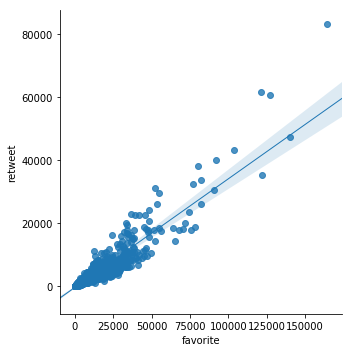

In [76]:
sns.lmplot(x = 'favorite', y = 'retweet', data = time_df, scatter_kws={'marker':'x'},line_kws={'linewidth':1})

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

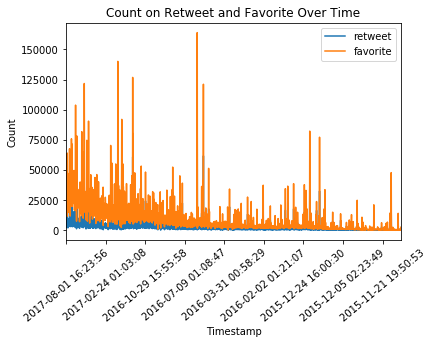

In [7]:
time_df.plot()
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Count on Retweet and Favorite Over Time')
plt.xticks(rotation=40)

In [90]:
df['rating_ratio'] = df['rating_numerator']/df['rating_denominator']

In [9]:
rating_df = df[['timestamp','rating_ratio']]
rating_df.set_index('timestamp',inplace = True)

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

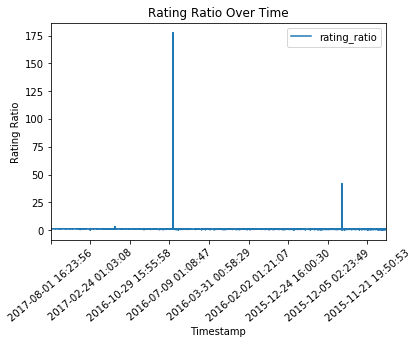

In [10]:
rating_df.plot()
plt.xlabel('Timestamp')
plt.ylabel('Rating Ratio')
plt.title('Rating Ratio Over Time')
plt.xticks(rotation=40)

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

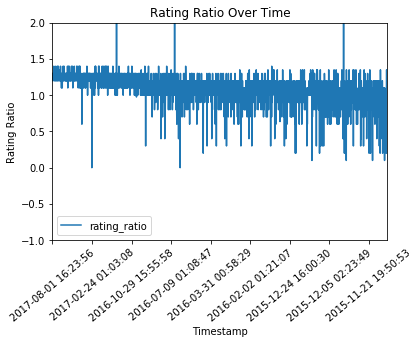

In [91]:
rating_df.plot()
plt.ylim(-1, 2)
plt.xlabel('Timestamp')
plt.ylabel('Rating Ratio')
plt.title('Rating Ratio Over Time')
plt.xticks(rotation=40)

Text(0.5,1,'Retweet vs Favorite by Dog Stage')

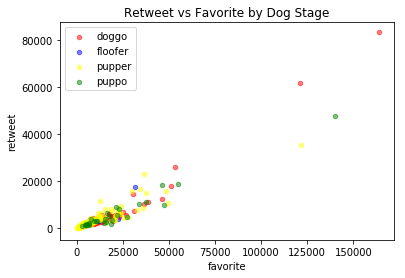

In [13]:
doggo_df = df[df['dog_stage'] == 'doggo']
floofer_df = df[df['dog_stage'] == 'floofer']
pupper_df = df[df['dog_stage'] == 'pupper']
puppo_df = df[df['dog_stage'] == 'puppo']
x = doggo_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'red', alpha = 0.5)
floofer_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'blue', ax = x,  alpha = 0.5)
pupper_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'yellow',ax = x,  alpha = 0.5)
puppo_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'green', ax = x,  alpha = 0.5)
plt.legend(['doggo','floofer','pupper','puppo'])
plt.title('Retweet vs Favorite by Dog Stage')

Text(0.5,1,'Retweet vs Favorite by Dog Stage')

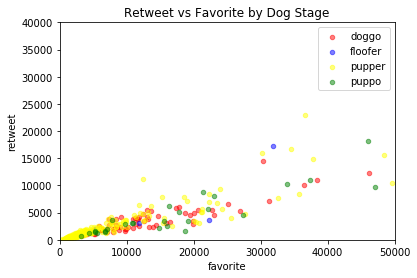

In [14]:
x = doggo_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'red', xlim = (0,50000), ylim = (0,40000), alpha = 0.5)
floofer_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'blue', xlim = (0,50000), ylim = (0,40000), ax = x,  alpha = 0.5)
pupper_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'yellow',xlim = (0,50000), ylim = (0,40000), ax = x,  alpha = 0.5)
puppo_df.plot(x = 'favorite', y = 'retweet', kind = 'scatter',color = 'green', xlim = (0,50000), ylim = (0,40000), ax = x,  alpha = 0.5)
plt.legend(['doggo','floofer','pupper','puppo'])
plt.title('Retweet vs Favorite by Dog Stage')

To get the breed of dogs in the dataset, take the p1 as primary prediction, if p1_dog is false, take p2, otherwise, take p3. Then join three table togeter, drop extra columns and rename the columns!

In [15]:
breed = df[['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']]

In [16]:
df1 = breed[breed['p1_dog'] == True]
col1 = ['p2','p2_dog','p2_conf','p3','p3_dog','p3_conf']
df1_ = df1.drop(col1, axis = 1)

In [17]:
df1_.columns = ['dog_breed','dog','dog_conf']
df1_.head()

,dog_breed,dog,dog_conf
1,chihuahua,True,0.323581
2,chihuahua,True,0.716012
4,basset,True,0.555712
5,chesapeake_bay_retriever,True,0.425595
6,appenzeller,True,0.341703


In [18]:
df2 = breed[(breed['p1_dog'] == False) & (breed['p2_dog'] == True)]
col2 = ['p1','p1_dog','p1_conf','p3','p3_dog','p3_conf']
df2_ = df2.drop(col2, axis = 1)

In [19]:
df2_.columns = ['dog_breed','dog','dog_conf']
df2_.head()

,dog_breed,dog,dog_conf
3,labrador_retriever,True,0.168086
61,labrador_retriever,True,0.033496
91,pug,True,0.066736
106,french_bulldog,True,0.099984
142,malamute,True,0.216163


In [20]:
df3 = breed[(breed['p1_dog'] == False) & (breed['p2_dog'] == False) & (breed['p2_dog'] == True)]
df3

,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf


In [21]:
breed_df = pd.concat([df1_, df2_])

In [98]:
breed_df.head()

,dog_breed,dog,dog_conf
1,chihuahua,True,0.323581
2,chihuahua,True,0.716012
4,basset,True,0.555712
5,chesapeake_bay_retriever,True,0.425595
6,appenzeller,True,0.341703


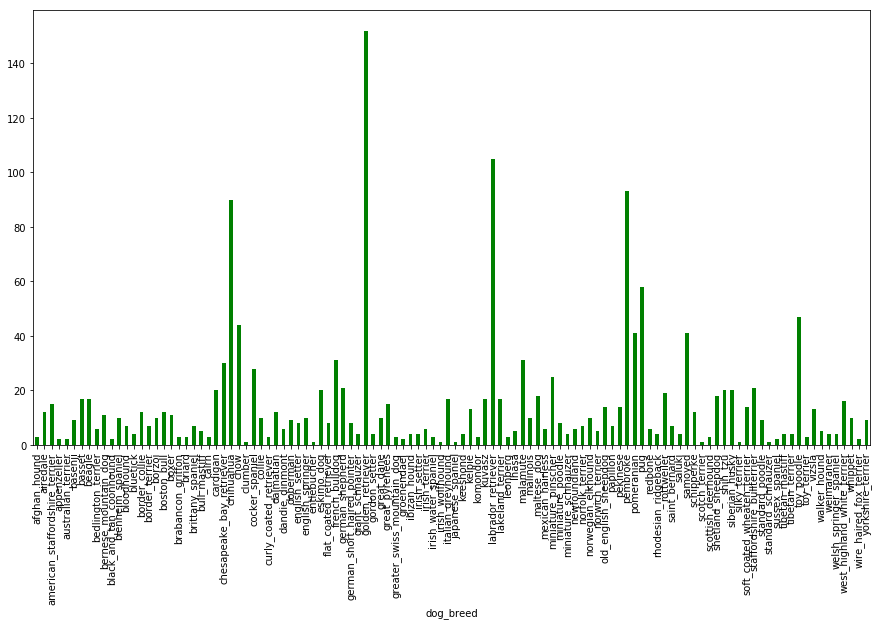

In [96]:
breed_df.groupby('dog_breed').count().dog.plot(kind = 'bar', figsize = (15,8),color = 'green')

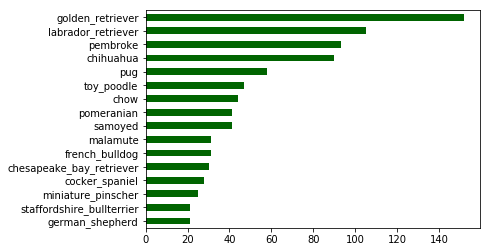

In [99]:
breed_df.dog_breed.value_counts()[15::-1].plot(kind = 'barh', color = 'darkgreen' )

In [ ]:
# Wrangle Report (300-600)

In [4]:
# Act Report (250+)